In [1]:
import pandas as pd
import random

input = pd.read_excel("section3.xlsx")
input.head()


,Type of Newsday,Probability,Cumulative Probability,Type from,Type to,Daily purchase,Cost,Selling price,Profit,Price of scrap,Demand,Good from,Good to,Fair from,Fair to,Poor from,Poor to
0,Good,0.35,0.35,1.0,35.0,70.0,0.33,0.5,0.17,0.05,40,1,3,1.0,10.0,1,44
1,Fair,0.45,0.80,36.0,80.0,NaN,NaN,NaN,NaN,NaN,50,4,8,11.0,28.0,45,66
2,Poor,0.20,1.00,81.0,100.0,NaN,NaN,NaN,NaN,NaN,60,9,23,29.0,68.0,67,82
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,24,43,69.0,88.0,83,94
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,44,78,89.0,96.0,95,100


In [2]:

#Rand Type of Newsday
randomTime = 19
RandType =[random.randint(1, 100) for _ in range(randomTime)]

#Rand for Demand
RandDemand =[random.randint(1, 100) for _ in range(randomTime)]

#Type of Newsday
Types = []
for i in range(len(RandType)):
  for j in range(len(input['Type from'])):
    if input['Type from'][j] <= RandType[i] <= input['Type to'][j]:
      Types.append(input['Type of Newsday'][j])

#Demand
Demand = []
for i in range(len(RandDemand)):
    for j in range(len(input['Demand'])):
        if Types[i] == "Good" :
            if input['Good from'][j] <= RandDemand[i] <= input['Good to'][j]:
                Demand.append(input['Demand'][j])
        if Types[i] == "Fair" :
            if input['Fair from'][j] <= RandDemand[i] <= input['Fair to'][j]:
                Demand.append(input['Demand'][j])
        if Types[i] == "Poor" :
            if input['Poor from'][j] <= RandDemand[i] <= input['Poor to'][j]:
                Demand.append(input['Demand'][j])

#Revenue from Sales
Revenue =[]
for i in range(len(Demand)):
    if Demand[i] > input['Daily purchase'][0] :
        Revenue.append(input['Daily purchase'][0]*input['Selling price'][0])
    else :
        Revenue.append(Demand[i]*input['Selling price'][0])

#Excess Demand
ExcessDemand =[]
for i in range(len(Demand)):
    if Demand[i] > input['Daily purchase'][0] :
        ExcessDemand.append(Demand[i]-input['Daily purchase'][0])
    else :
        ExcessDemand.append(0)

#Lost Profit
LostProfit =[]
for i in range(len(ExcessDemand)):
    LostProfit.append(ExcessDemand[i]*input['Profit'][0])

#Scrap Papers
ScrapPapers =[]
for i in range(len(Demand)):
    if Demand[i] < input['Daily purchase'][0] :
        ScrapPapers.append(input['Daily purchase'][0]-Demand[i])
    else :
        ScrapPapers.append(0)
#Salvage from Sale of Scrap
SalvageScrapPapers = []
for i in range(len(ScrapPapers)):
    SalvageScrapPapers.append(ScrapPapers[i]*input['Profit'][0])

#Daily Profit
DailyProfit =[]
for i in range(len(Revenue)):
    DailyProfit.append(Revenue[i] + SalvageScrapPapers[i] - LostProfit[i] -(input['Selling price'][0]*input['Cost'][0]))

data = {
    'Day': range(1, 20),
    'Rand Type of Newsday': RandType ,
    'Type of Newsday' : Types ,
    'Rand for Demand':RandDemand,
    'Demand' : Demand,
    'Revenue from Sales' : Revenue,
    'Excess Demand':ExcessDemand ,
    'Lost Profit':LostProfit,
    'Scrap Papers':ScrapPapers,
    'Salvage from Sale of Scrap':SalvageScrapPapers,
    'Daily Profit':DailyProfit
}
output = pd.DataFrame(data)
print(output)

    Day  Rand Type of Newsday Type of Newsday  Rand for Demand  Demand  \
0     1                    28            Good               78      80   
1     2                    36            Fair                1      40   
2     3                    47            Fair               32      60   
3     4                    95            Poor               47      50   
4     5                    70            Fair               47      60   
5     6                    82            Poor               55      50   
6     7                    11            Good               37      70   
7     8                    99            Poor                8      40   
8     9                    91            Poor               68      60   
9    10                    48            Fair               90      80   
10   11                    85            Poor               88      70   
11   12                    73            Fair               88      70   
12   13                    59         

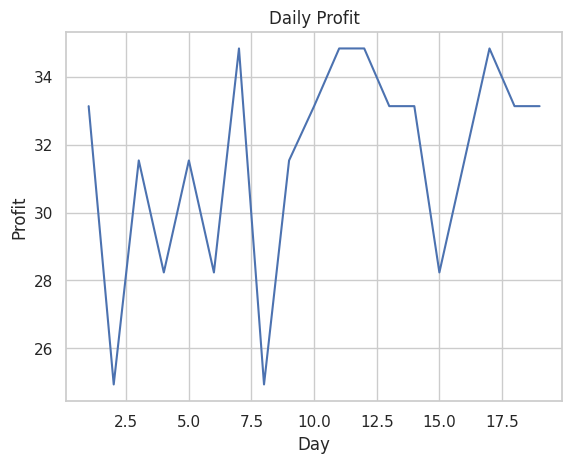

In [4]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data , x='Day', y='Daily Profit')

plt.title('Daily Profit')
plt.xlabel('Day')
plt.ylabel('Profit')
plt.show()



Accuracy of LinearRegression =  1.0
Predictions of LinearRegression : [33.135 28.235 34.835 24.935]
Accuracy of Ridge = 0.9999998966741159
Predictions of Ridge : [33.13623106 28.2362608  34.83451413 24.93674036]
Accuracy of Random Forest = 0.9803730738037308
Predictions of Random Forest : [33.135 28.235 34.835 26.035]


<ipython-input-5-c9a5fef68127>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=final_result, palette='viridis', width=0.6)


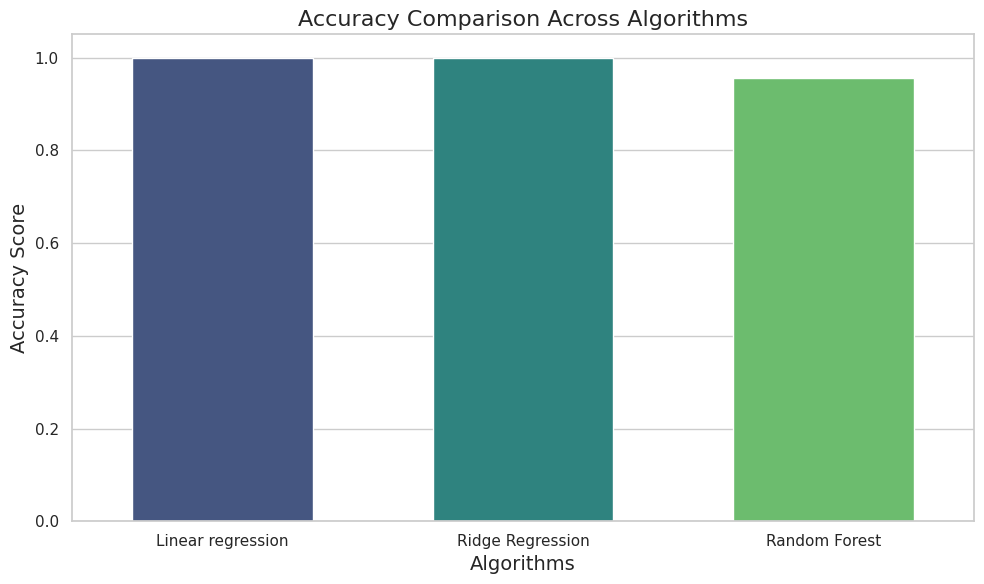

In [5]:
#Learning Model
from sklearn.model_selection import train_test_split
X = output.drop(['Daily Profit','Type of Newsday'] ,axis=1)
y = output['Daily Profit']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

#LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xTrain, yTrain)
Y_predict = lr.predict(xTest)
print('Accuracy of LinearRegression = ',lr.score(xTrain,yTrain))
print("Predictions of LinearRegression :", Y_predict)

#Ridge Regression
from sklearn.linear_model import Ridge
rg = Ridge(alpha=0.1)
rg.fit(xTrain, yTrain)
yPredict = rg.predict(xTest)
print("Accuracy of Ridge =", rg.score(xTest, yTest))
print("Predictions of Ridge :", yPredict)

#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=3 , random_state = 0)
rf.fit(xTrain,yTrain)
yPredict = rf.predict(xTest)
print('Accuracy of Random Forest =', rf.score(xTest,yTest))
print("Predictions of Random Forest :", yPredict)

#Algorithms and accuracy visualization
final_result = pd.DataFrame({
    'Algorithm': ['Linear regression', 'Ridge Regression', 'Random Forest'],
    'Accuracy': [lr.score(xTrain,yTrain),rg.score(xTrain,yTrain), rf.score(xTrain,yTrain)]
})

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=final_result, palette='viridis', width=0.6)
plt.title("Accuracy Comparison Across Algorithms", fontsize=16)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.tight_layout()
plt.show()